In [1]:
from probeinterface import get_probe
from probeinterface.plotting import plot_probe

In [2]:
nhp_probe = get_probe(manufacturer='imec', probe_name='NP1032')

In [3]:
print(nhp_probe.get_contact_count())

4416


(<matplotlib.collections.PolyCollection at 0x7d168fb8f310>,
 <matplotlib.collections.PolyCollection at 0x7d168fb8f2e0>)

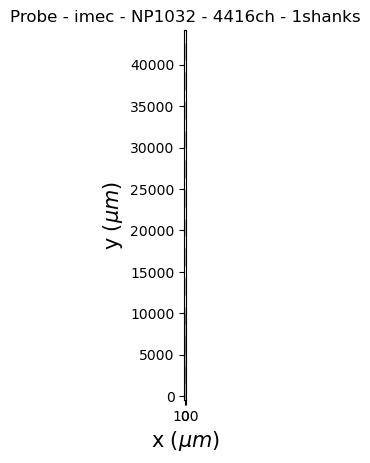

In [4]:
plot_probe(nhp_probe)

In [6]:
import json
import numpy as np
nhp_probe_dict = nhp_probe.to_dict()

In [7]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)

In [8]:
nhp_group_dict = {
    "specification": "probeinterface",
    "version": "0.1.0", 
    "probes": [nhp_probe_dict] # List containing your single probe
}

In [9]:
output_file_path = 'NP1032_NHP_Long_Geometry.json'
with open(output_file_path, 'w') as f:
    json.dump(nhp_group_dict, f, indent=4, cls=NpEncoder)

In [10]:
# now let's check the gui
!neurocarto &

Opening in existing browser session.
ERROR:bokeh.server.protocol_handler:error handling message
 message: Message 'PATCH-DOC' content: {'events': [{'kind': 'MessageSent', 'msg_type': 'bokeh_event', 'msg_data': {'type': 'event', 'name': 'button_click', 'values': {'type': 'map', 'entries': [['model', {'id': 'p1111'}]]}}}]} 
 error: ValueError('too many values to unpack (expected 5)')
Traceback (most recent call last):
  File "/home/chris/anaconda3/envs/neuro/lib/python3.12/site-packages/bokeh/server/protocol_handler.py", line 94, in handle
    work = await handler(message, connection)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chris/anaconda3/envs/neuro/lib/python3.12/site-packages/bokeh/server/session.py", line 94, in _needs_document_lock_wrapper
    result = func(self, *args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/chris/anaconda3/envs/neuro/lib/python3.12/site-packages/bokeh/server/session.py", line 286, in _handle_patch
    message.apply_to_d

In [ ]:
# now try with a background image loaded
!neurocarto --atlas=None --view=NHP_Cor.png

Opening in existing browser session.
[WARNING] neurocarto.view - init view fail
Traceback (most recent call last):
  File "/home/chris/anaconda3/envs/neuro/lib/python3.10/site-packages/neurocarto/views/utils.py", line 68, in init_view
    return view_type(config)
  File "/home/chris/anaconda3/envs/neuro/lib/python3.10/site-packages/neurocarto/views/atlas.py", line 104, in __init__
    self.brain = get_atlas_brain(config.atlas_name, config.atlas_root)
  File "/home/chris/anaconda3/envs/neuro/lib/python3.10/site-packages/neurocarto/util/atlas_brain.py", line 22, in get_atlas_brain
    return BrainGlobeAtlas(
  File "/home/chris/anaconda3/envs/neuro/lib/python3.10/site-packages/brainglobe_atlasapi/bg_atlas.py", line 91, in __init__
    raise ValueError(f"{atlas_name} is not a valid atlas name!")
ValueError: None is not a valid atlas name!


In [14]:
from probeinterface.io import write_probeinterface

In [15]:
out_file = 'NP1032_NHP_Long.json'

In [16]:
write_probeinterface(out_file,nhp_probe)
print(f"Successfully exported full NHP geometry to: {out_file}")

Successfully exported full NHP geometry to: NP1032_NHP_Long.json


/bin/bash: line 1: neurocarto_run: command not found
